<a href="https://colab.research.google.com/github/dileep-rawat/Capstone_Project_3-Credit_Card_default_Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>



##### **Project Type**    - Classification(Supervised Learning)
##### **Contribution**    - Individual
##### **Member 1**        - Dileep Rawat


# **Project Summary -**

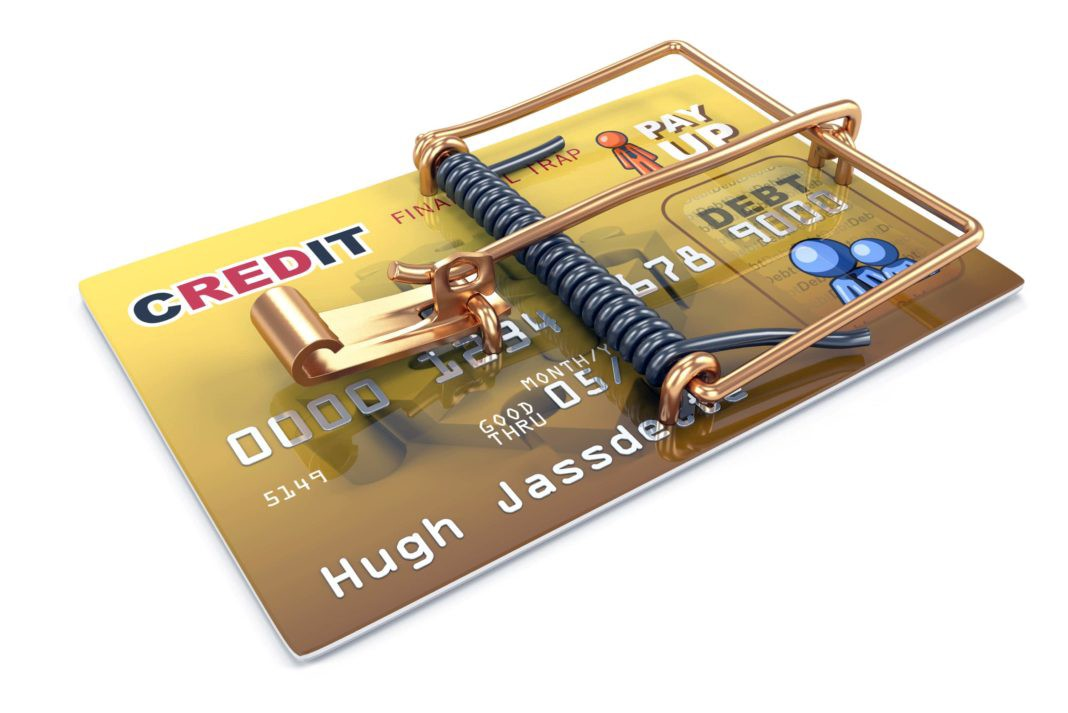

*The goal of data science is **to construct the means for extracting business-focused insights** from data. This requires an understanding of how value and information flows in a business, and the ability to use that understanding to identify business opportunities.*

*Credit cards have become one of the most important financial products across the globe. These days, credit cards have become so popular that almost everyone can be seen owning one. Its popularity is always on the rise because of the immense convenience it provides to its cardholders while making payments. When used mindfully, credit cards can never land one in financial trouble. The trick is to keep an eye on the expenditure that is being made on the credit card. This is why a credit card statement plays a vital role. The crucial part is the prediction of credit card defaulter for the stable supply.*

*In the initial phase, we have focused more on the data cleaning and analyzed data in various categories. In later part we have tried to come out with conclusion for give problem statement. From this we have tried to bring out best results out of our analysis.*

*We have faced major challenge in data cleaning on which feature to be dropped or kept. After data exploration we found that there was no duplicate and null values. We have converted columns to appropriate data types and also added appropriate columns.*

*From Exploratory Data Analysis we got to know that few columns which have categorical data having numerical type.With the cleaned data, we have performed Exploratory Data Analysis to understand the behaviour of our target variable. Our target variable was positively skewed.* 

*We drew some conclusion form EDA like more number of credit defaulters are female, more number of credit  defaulters are university students followed by Graduates and High school students.The data	contains	outliers,	but	we didn’t	handle them since	by doing so, we may eliminate the patterns in the data we discovered.*

*We fit 4 different type of models namely Logistic Regression, k_nearest neighbours, RandomForestClassifier and XGB boostclassifier are used to train the model and predict the output as Non-defaulter or defaulter*



# **GitHub Link -**

 **GitHub Link: https://github.com/dileep-rawat/Capstone_Project_3-Credit_Card_default_Prediction**

# **Problem Statement**


### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [222]:
# Import Libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import metrics

# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

### Dataset Loading

In [223]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
#reading excel file:-
credit_df = pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Project/Credit Card Default Prediction/default of credit card clients.xls')

### Dataset First View

In [225]:
# Dataset First Look
credit_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [226]:
# Dataset Rows & Columns count
credit_df.shape

(30001, 25)

### Dataset Information

In [227]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [228]:
# Dataset Duplicate Value Count
credit_df.duplicated().value_counts() 

False    30001
dtype: int64

There is no duplicate values.

#### Missing Values/Null Values

In [229]:
# Missing Values/Null Values Count
credit_df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,Unnamed: 0,0
1,X13,0
2,X23,0
3,X22,0
4,X21,0
5,X20,0
6,X19,0
7,X18,0
8,X17,0
9,X16,0


Text(0.5, 1.0, 'Missing values in column')

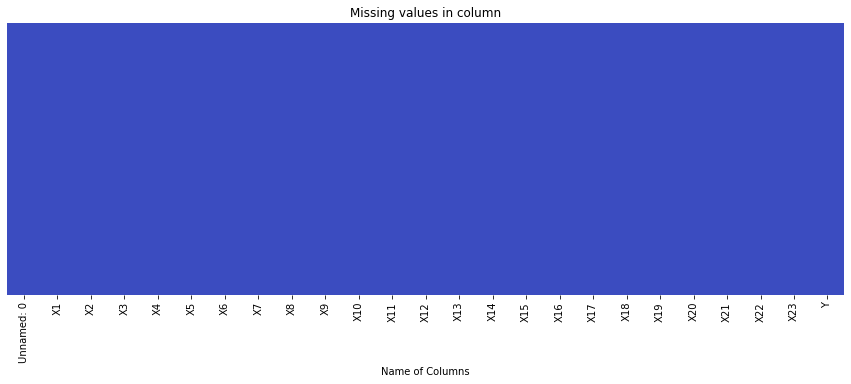

In [230]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(credit_df.isnull(), cbar=False, yticklabels=False,cmap='coolwarm')
plt.xlabel("Name of Columns")
plt.title("Missing values in column")

### What did you know about your dataset?

* **The dataset given is a dataset from credit card industry, and we have to analysis the default of customers and the insights behind it.**

* **Defaulter prediction is analytical studies on the possibility of a customer defaulting on credit card.**

* **The above dataset has 30001 rows and 25 columns. There are no mising values and duplicate values in the dataset.** 


## ***2. Understanding Your Variables***

In [231]:
# Dataset Columns
credit_df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [232]:
# Dataset Describe
credit_df.describe(include='all')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description 

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
*  X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
*  X2: Gender (1 = male; 2 = female).
*  X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
*  X4: Marital status (1 = married; 2 = single; 3 = others).
*  X5: Age (year).
*  X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
*  X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
*  X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Check Unique Values for each variable.

In [233]:
# Check Unique Values for each variable.
for i in credit_df.columns.tolist():
  print("No. of unique values in ",i,"is",credit_df[i].nunique(),".")

No. of unique values in  Unnamed: 0 is 30001 .
No. of unique values in  X1 is 82 .
No. of unique values in  X2 is 3 .
No. of unique values in  X3 is 8 .
No. of unique values in  X4 is 5 .
No. of unique values in  X5 is 57 .
No. of unique values in  X6 is 12 .
No. of unique values in  X7 is 12 .
No. of unique values in  X8 is 12 .
No. of unique values in  X9 is 12 .
No. of unique values in  X10 is 11 .
No. of unique values in  X11 is 11 .
No. of unique values in  X12 is 22724 .
No. of unique values in  X13 is 22347 .
No. of unique values in  X14 is 22027 .
No. of unique values in  X15 is 21549 .
No. of unique values in  X16 is 21011 .
No. of unique values in  X17 is 20605 .
No. of unique values in  X18 is 7944 .
No. of unique values in  X19 is 7900 .
No. of unique values in  X20 is 7519 .
No. of unique values in  X21 is 6938 .
No. of unique values in  X22 is 6898 .
No. of unique values in  X23 is 6940 .
No. of unique values in  Y is 3 .


## 3. ***Data Wrangling***

### Data Wrangling Code

###**Droping and renaming the features:**

In [234]:
# Write your code to make your dataset analysis ready.
#Droping the unnamed column
credit_df.drop(columns='Unnamed: 0',inplace=True)

In [235]:
credit_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [236]:
# creating list of columns name for renaming data frame column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [237]:
 # replace column name with columns list
credit_df.set_axis(columns, axis=1, inplace=True)

In [238]:
# droping the axis 0
credit_df=credit_df.drop(0,axis=0).reset_index(drop=True)

In [239]:
credit_df.columns

Index(['Limit_bal', 'Gender', 'Education', 'Marital_status', 'Age',
       'Repayment_September', 'Repayment_August', 'Repayment_July',
       'Repayment_June', 'Repayment_May', 'Repayment_April', 'Sep_Bill',
       'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill', 'Pay_Sep',
       'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April', 'Defaulter'],
      dtype='object')

### **Convert columns to appropriate datatypes:**

In [240]:
# Converting all columns from Object to int 
for i in credit_df.columns:
  credit_df[i]=credit_df[i].astype('int')

In [241]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Limit_bal            30000 non-null  int64
 1   Gender               30000 non-null  int64
 2   Education            30000 non-null  int64
 3   Marital_status       30000 non-null  int64
 4   Age                  30000 non-null  int64
 5   Repayment_September  30000 non-null  int64
 6   Repayment_August     30000 non-null  int64
 7   Repayment_July       30000 non-null  int64
 8   Repayment_June       30000 non-null  int64
 9   Repayment_May        30000 non-null  int64
 10  Repayment_April      30000 non-null  int64
 11  Sep_Bill             30000 non-null  int64
 12  Aug_Bill             30000 non-null  int64
 13  July_Bill            30000 non-null  int64
 14  June_Bill            30000 non-null  int64
 15  May_Bill             30000 non-null  int64
 16  Apr_Bill             3


### **Categorical Features:**

**SEX:**


*  1- Male
*  2- Female

In [242]:
# Value count of Gender Column
credit_df.Gender.value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

In [243]:
# converting Gender 1 & 2 value in Male & Female for better understanding  
credit_df['Gender'] = credit_df['Gender'].apply(lambda x:'Male'  if x == 1 else 'Female')

**Education**:

In [244]:
# Value count of Education Column
credit_df.Education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them to others

In [245]:
# In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others
credit_df['Education']=credit_df['Education'].apply(lambda x :'graduate' if x==1 else ('university' if x==2 else ('high school' if x==3  else 'others')))

**Marital Status:**

In [246]:
# Value count of Marital_status Column
credit_df.Marital_status.value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital_status, dtype: int64

The given values are 1 = married; 2 = single; 3 = others so 0 is  not given in data, we include them on others

In [247]:
credit_df['Marital_status']=credit_df['Marital_status'].apply(lambda x: "married" if x==1 else ("single" if x==2 else 'others'))

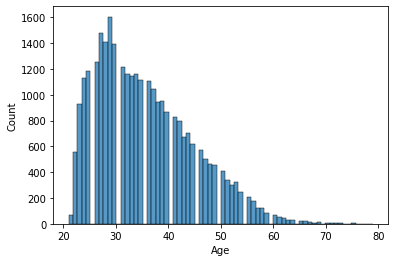

In [248]:
# visualizing the Age column for better understanding with histplot
sns.histplot(credit_df['Age'])

From this hist plot we can divide age into 9 bins

In [249]:
# we are using Bining in Age column
credit_df['Age_group'] = pd.cut(credit_df.Age, bins=[20,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])

In [250]:
#value counts of all Repayments status Columns 
for i in credit_df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']].columns:
  print(credit_df[i].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment_September, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Repayment_August, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Repayment_July, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: Repayment_June, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: Repayment_May, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: Repayment_April, dtype: int64


In data description we have not given information about 0 and -2 values 

In [251]:
# Defining function for all Repayments status value which is less than 0, consider as 0
def repaymentsstatus(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [252]:
# Apply function on Repayments status columns
for i in credit_df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']].columns:
  credit_df[i]=credit_df[i].apply(repaymentsstatus)

**Removed all the data of the people who had made their payment on time but still they were showing defaulter.** 

In [253]:
credit_df=credit_df[~((credit_df['Repayment_April']==0) & (credit_df['Repayment_May']==0) & (credit_df['Repayment_June']==0) & (credit_df['Repayment_July']==0) & (credit_df['Repayment_August']==0) & (credit_df['Repayment_September']==0) & (credit_df['Defaulter']==1))]

In [254]:
credit_df.head()

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,...,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter,Age_group
0,20000,Female,university,married,24,2,2,0,0,0,...,0,0,0,689,0,0,0,0,1,21-25
1,120000,Female,university,single,26,0,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,26-30
2,90000,Female,university,single,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-35
3,50000,Female,university,married,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,36-40
4,50000,Male,university,married,57,0,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,56-60


### What all manipulations have you done and insights you found?

* **Dropped the unnmaned column**
* **Renamed the features in a proper format**
* **In data given values are 1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others.**
* **In marital status the given values are 1 = married; 2 = single; 3 = others and 0 is not given in data, we include them on others**
* **In the repayment column, we have not given information about 0 and -2 values so we placed less then zero value to zero.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1 - Pie Chart on Dependant Variable i.e., Defaulter (Univariate):

In [255]:
# Chart - 1 visualization code

# Dependant Column Value Counts
credit_df.Defaulter.value_counts()

0    23364
1     4302
Name: Defaulter, dtype: int64

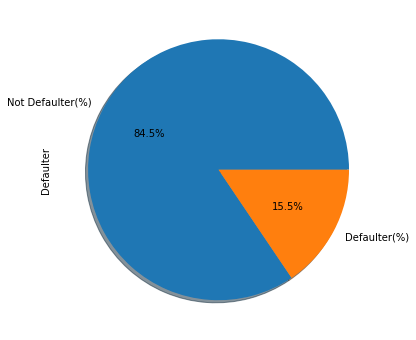

In [256]:
# Dependant Variable Column Visualization
credit_df['Defaulter'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.1f%%",shadow=True,labels=['Not Defaulter(%)','Defaulter(%)'])

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

* From the above chart I got to know that, there are 23364 customers that are not deafulter which is 84.5% of the whole customers data given in the dataset. 
* On other hand, 4302 customers are defaulter which is 15.5%% of the whole customers data given in the dataset.
* The dependent variable - Defaulter is imbalanced, with 84.5% non-default vs. 15.5% default.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customer defaulter is often referred to as customer who is not able to repay thier debt. Credit card companies often use customer defaulter  as a key business metrics to predict the number of customers that will default in repaying their debt. Defaulter is significant in the credit industry because it directly affects the financial status of the service provider. 

#### Chart - 2- Visulization of categorical variable:

In [257]:
categorical_variable = credit_df[['Gender','Education','Marital_status','Age_group']]

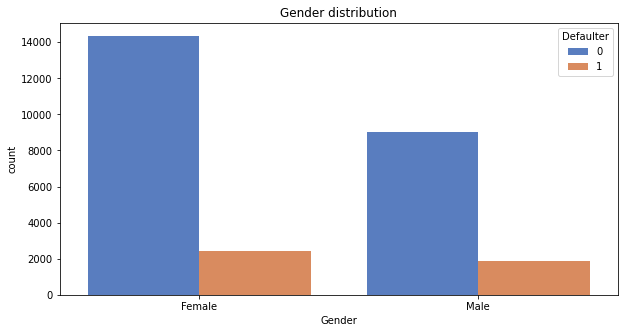

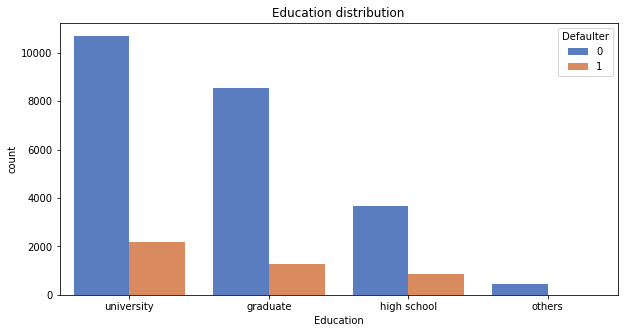

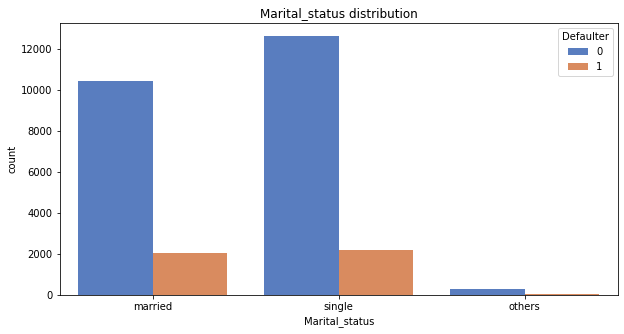

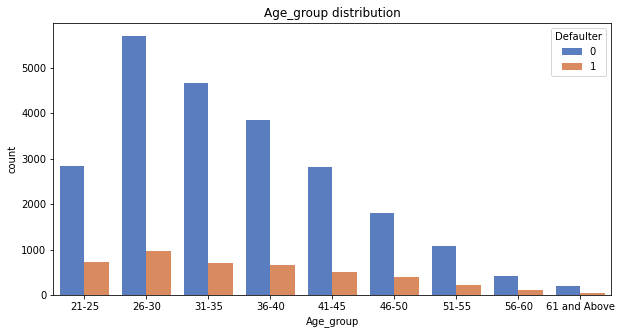

In [258]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_variable:
  plt.figure(figsize=(10,5))
  p = sns.countplot(x=i,data=credit_df,hue="Defaulter", palette="muted")
  plt.xlabel(i)
  plt.title(i+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.


##### 2. What is/are the insight(s) found from the chart?

* **More number of credit defaulters are female.**
* **More number of credit  defaulters are university students followed by Graduates and High school students.**
* **People who have marital status single have less default payment wrt married status people.**
* **The people of age group 26-40 year old are more likely to get default.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through these insights, we came to know the percentage of student type, age group, gender who are getting default in their repayment. So we can be more cautious while issuing them credit card.

#### Chart - 3- Boxplot for Limit_bal:

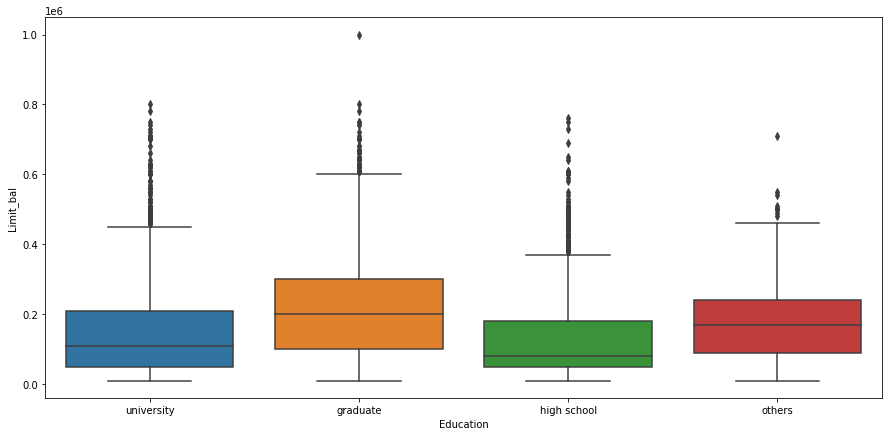

In [259]:
# Chart - 3 visualization code
plt.figure(figsize=(15,7))
sns.boxplot( x='Education',y='Limit_bal',data=credit_df )

##### 1. Why did you pick the specific chart?

As we know, Box plots give a good graphical image of the concentration of the data. They also show how far the extreme values are from most of the data. So through this we can know higher credit limit.

##### 2. What is/are the insight(s) found from the chart?

From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through this insights, we were able to know the group who are having the high credit limit and able to extract information regarding defaulter.

#### Chart - 4 - Subplot for Repayment column:

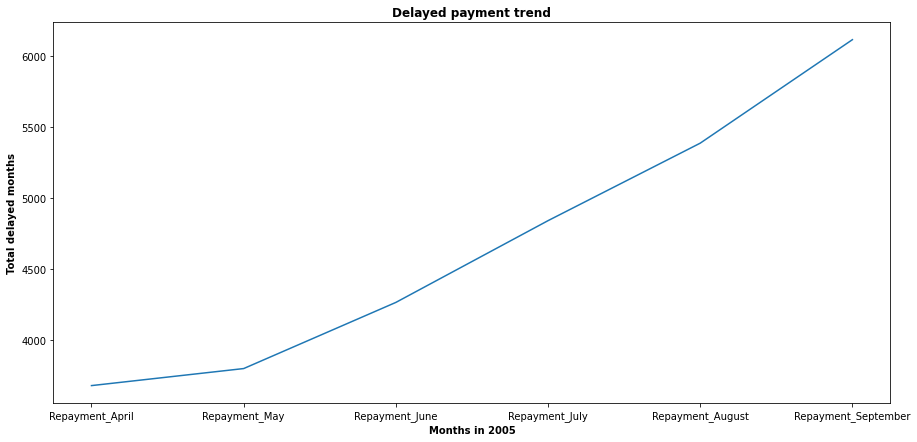

In [260]:
# Chart - 4 visualization code

has_default = credit_df[credit_df['Defaulter']== 1]
default_trend = has_default[['Repayment_April','Repayment_May','Repayment_June','Repayment_July','Repayment_August','Repayment_September']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots( figsize=(15, 7))
ax.plot(default_trend)

# givnig x & y label

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

The subplots() function in pyplot module of matplotlib library is used to create a figure and a set of subplots. IT is used to see the trend of variable with resepct to other variable.

##### 2. What is/are the insight(s) found from the chart?

There was a huge jump from May, 2005 to Sept, 2005 when delayed payment increased significantly, then it peaked at Sept, 2005. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From these insight, we could know which month is having highest amount delayed payment. This is could be of a great use for credit card companies.

#### Chart - 5 - Displot for Limit_bal:

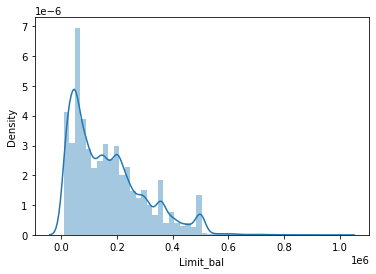

In [261]:
# Chart - 5 visualization code
sns.distplot(credit_df['Limit_bal'])

##### 1. Why did you pick the specific chart?

Displot shows distribution of variable and this helps in knowing the pattern of the variable. So i choosed the displot.

##### 2. What is/are the insight(s) found from the chart?

From this insights, we came to know that there are few customers who are having significantly high credit limit. This distribution is positively skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we have seen some customers are having high credit limit. So we can offer those kind of customer a premium featured credit card which will help in growth of the company.

#### Chart - 6 - Displot for all numerical col:

In [262]:
numerical_cols= ['Limit_bal','Repayment_September', 'Repayment_August',
       'Repayment_July', 'Repayment_June', 'Repayment_May', 'Repayment_April',
       'Sep_Bill', 'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill',
       'Apr_Bill', 'Pay_Sep', 'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May',
       'Pay_April']

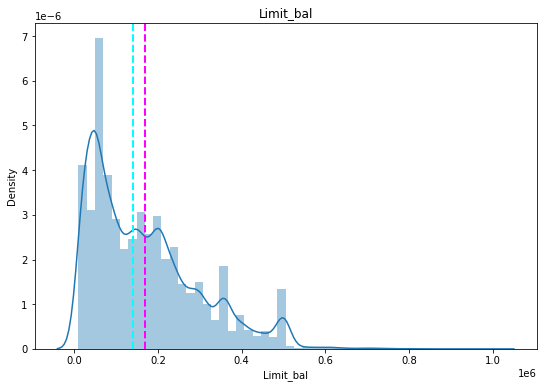

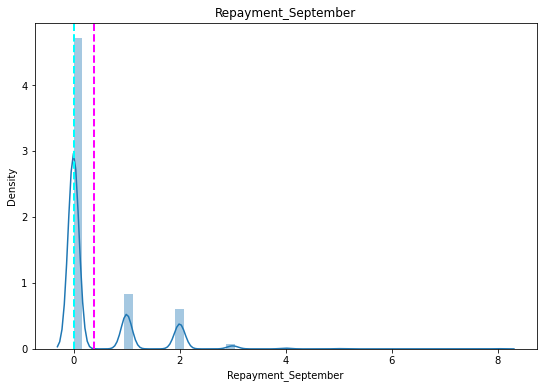

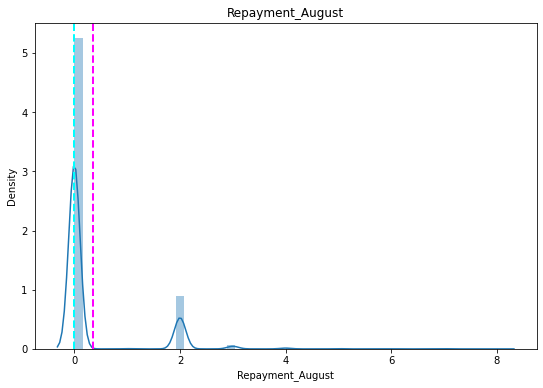

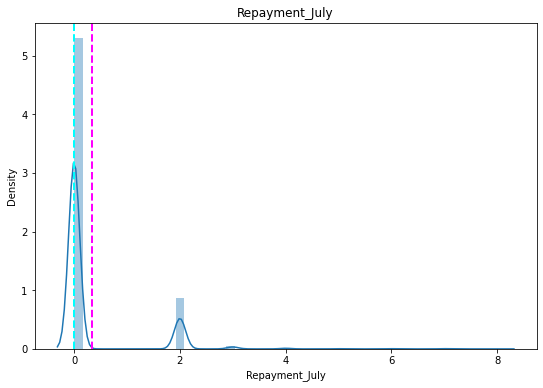

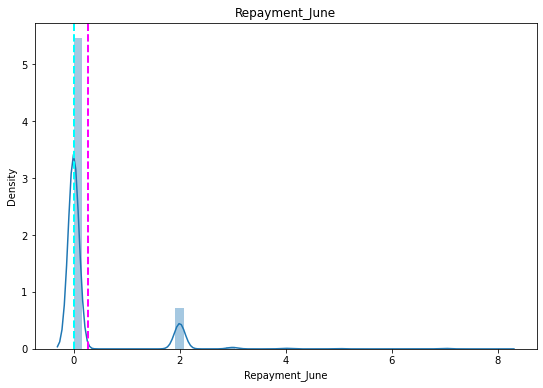

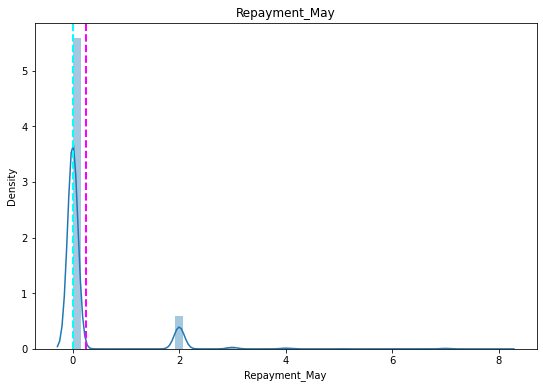

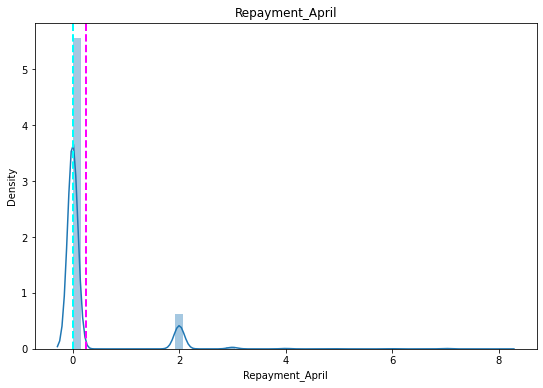

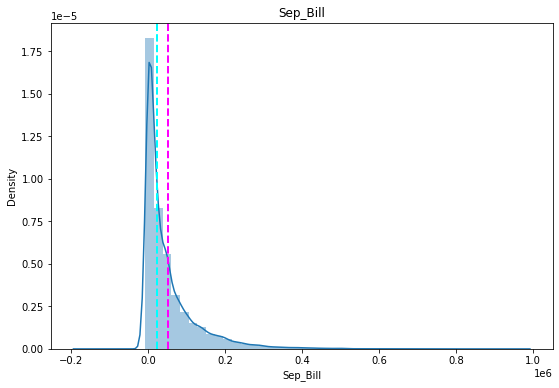

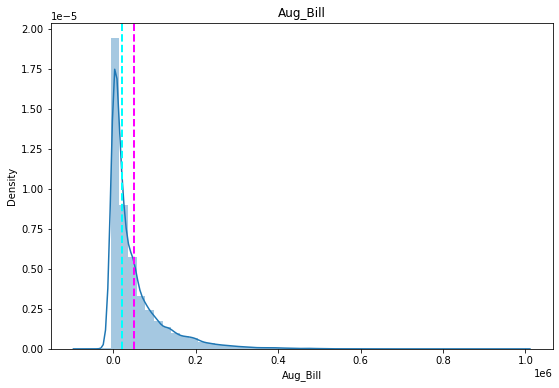

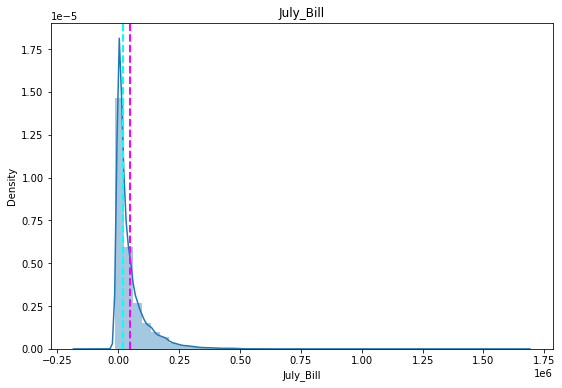

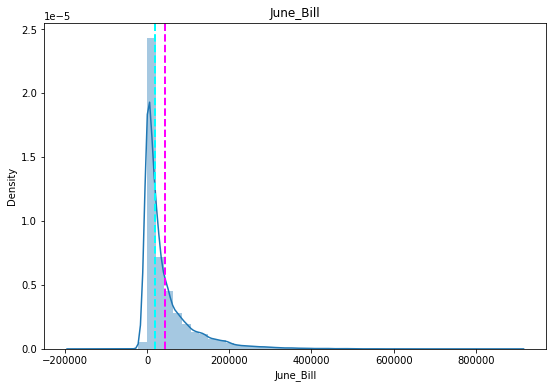

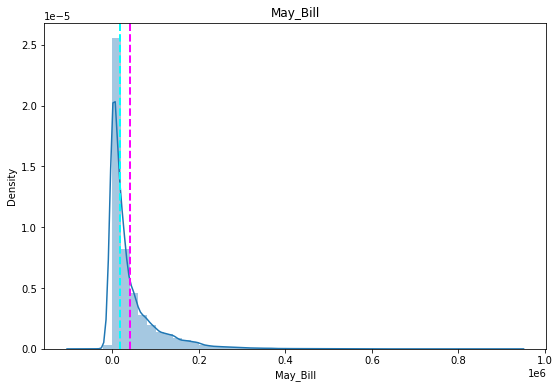

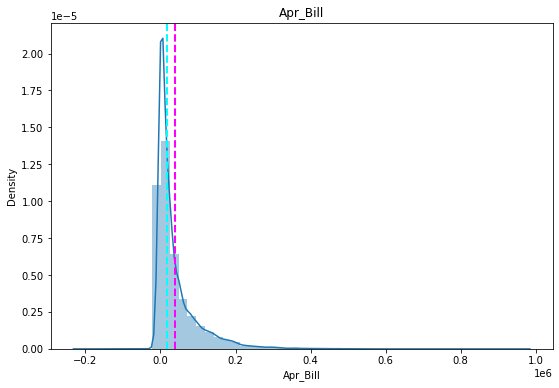

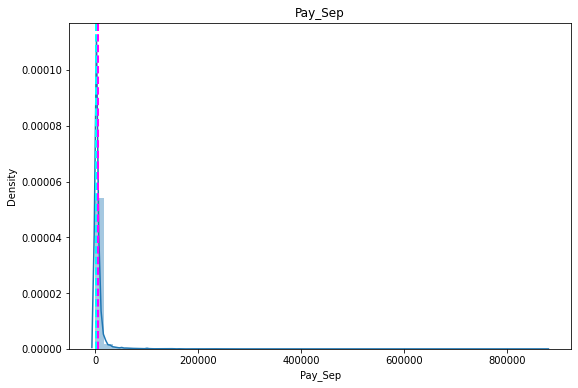

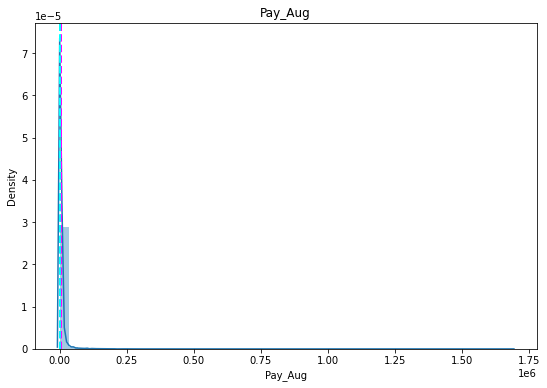

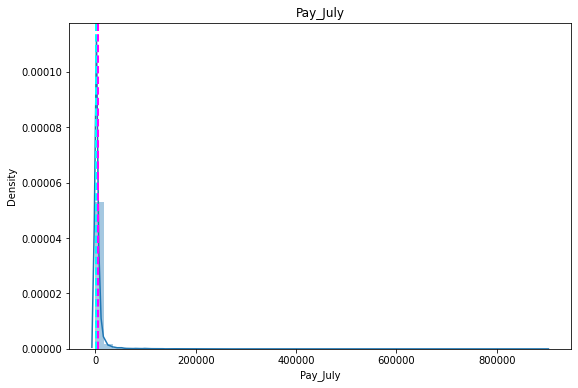

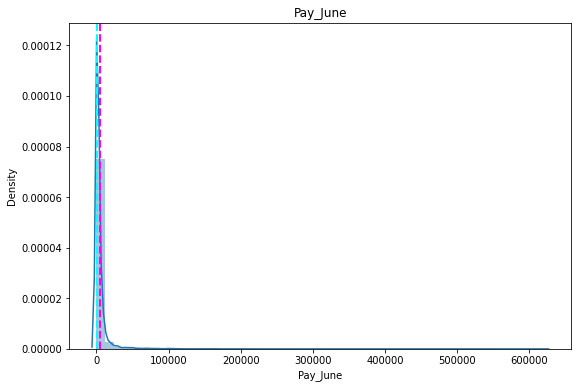

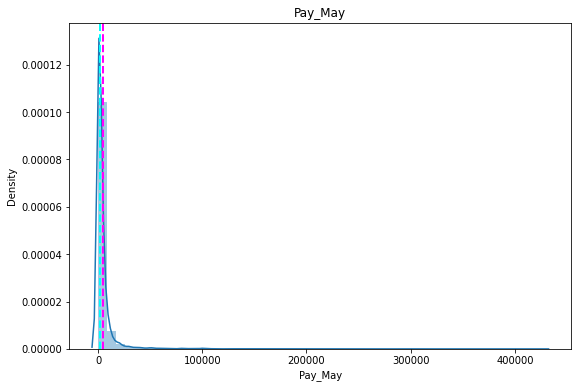

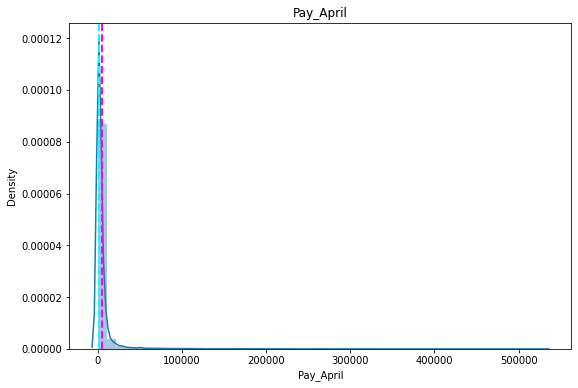

In [263]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in numerical_cols:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (credit_df[col])
  sns.distplot(credit_df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()


##### 1. Why did you pick the specific chart?

Answer:-In this graph the dataset have all column check the density and mean and median and the mean colour is magenta and median colour is cyan. :





#### Chart - 7 - Correlation Heatmap:

In [264]:
#Correlation With dependent Variable 
abs(credit_df.corr()['Defaulter']).sort_values(ascending=False)

Defaulter              1.000000
Repayment_September    0.566172
Repayment_August       0.468651
Repayment_July         0.417533
Repayment_June         0.386984
Repayment_May          0.370877
Repayment_April        0.352827
Limit_bal              0.181603
Pay_Sep                0.076126
Pay_May                0.064158
Pay_June               0.063659
Pay_April              0.062535
Pay_Aug                0.060522
Pay_July               0.058455
Sep_Bill               0.022461
Apr_Bill               0.012687
Aug_Bill               0.012067
May_Bill               0.010692
July_Bill              0.009103
Age                    0.004074
June_Bill              0.002206
Name: Defaulter, dtype: float64

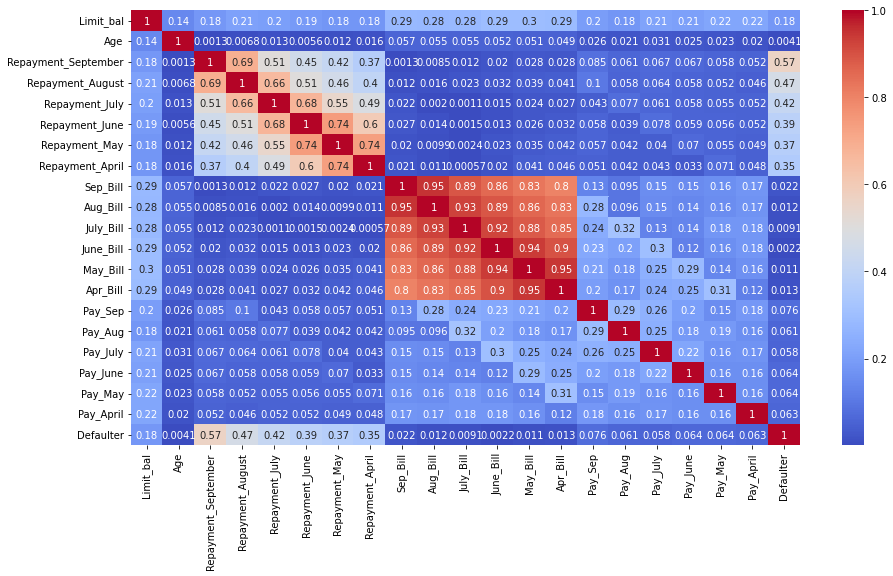

In [265]:
# Correlation Heatmap visualization code
 ## Correlation
plt.figure(figsize=(15,8))
correlation = credit_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap,it is observed that repayment columns and limit balance have higher correlation with the dependant variable.  


Rest all correlation can be depicted from the above chart.

#### Chart - 8 - Pair Plot: 

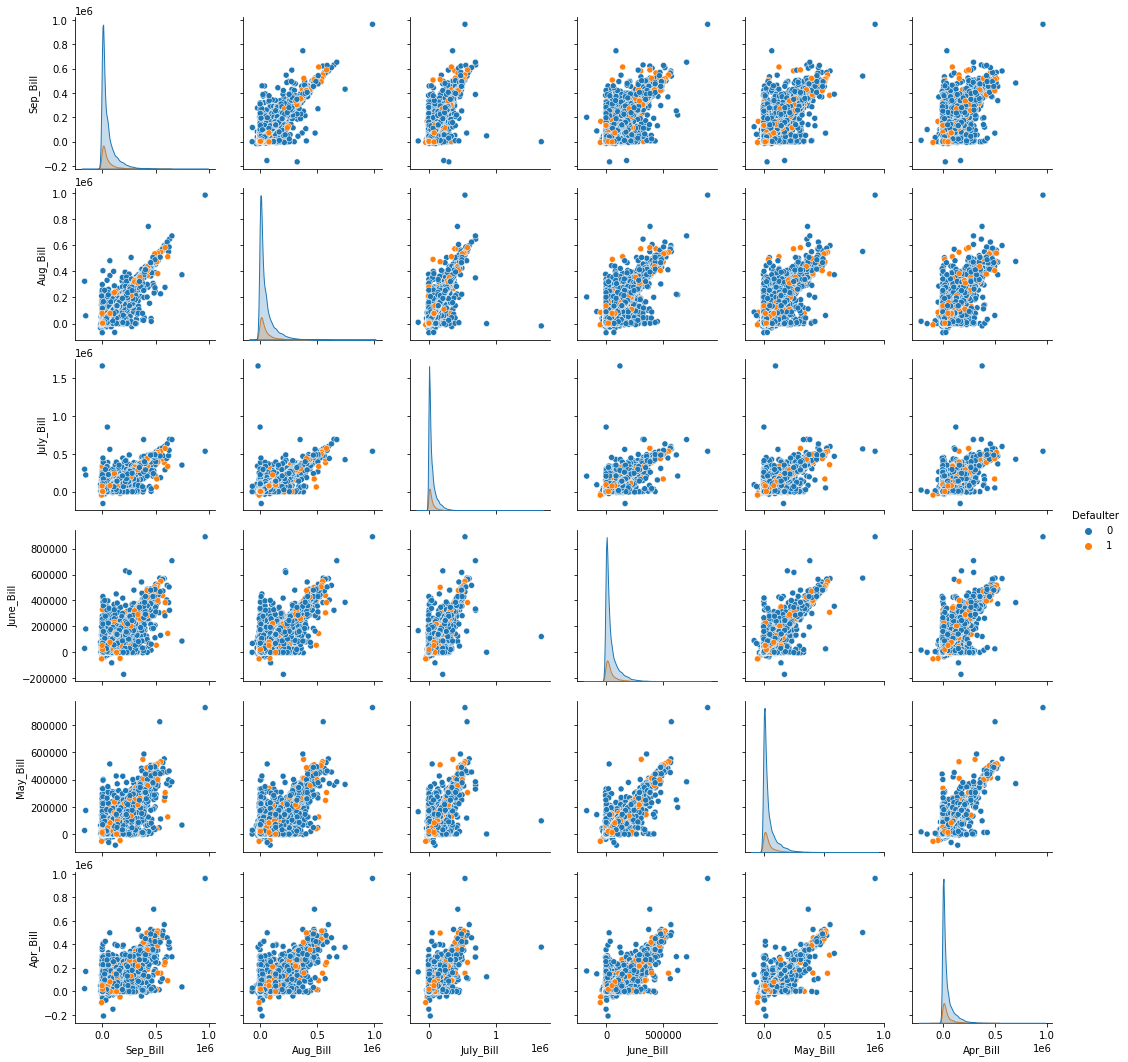

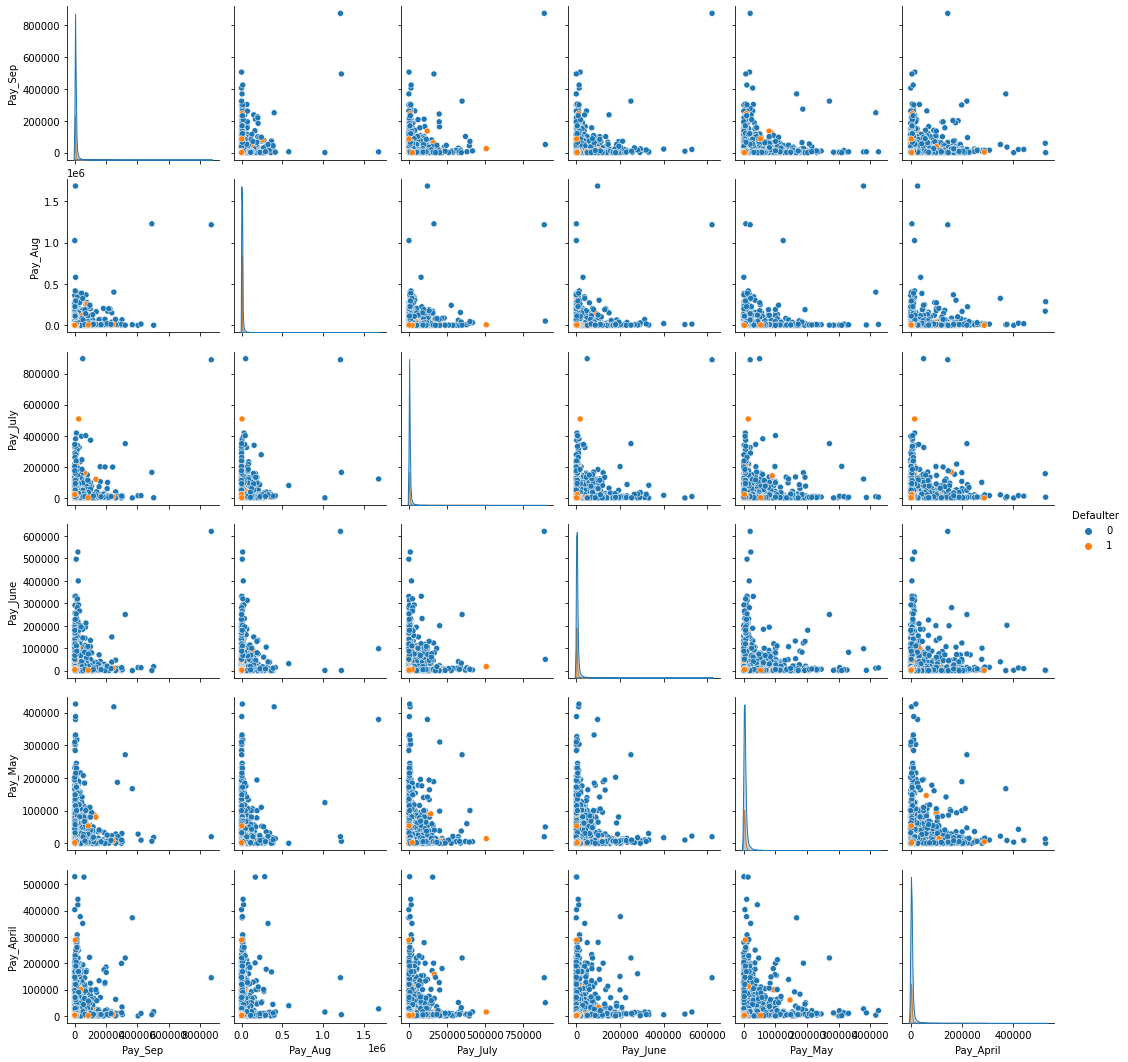

In [266]:
# # Pair Plot visualization code
# sns.pairplot(credit_df, hue="Defaulter")
sns.pairplot(credit_df, vars=credit_df.columns[11:17], kind='scatter',hue= 'Defaulter')
sns.pairplot(credit_df, vars=credit_df.columns[17:23],hue = 'Defaulter')

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are some linear relationship between variables and data points that aren't linearly separable. Defaulter customers data is clusetered and ovearlapped each other. Non-defaulter data are quite symmetrical in nature and defaulter customer data are quite non symmetric in nature.

## ***5. Hypothesis Testing***

* Null Hypothesis:- All variable depends on customers next month payment

* Alternate Hypothesis:- All variables do not depend on customers next month payment.

### Hypothetical Statement - 1

In [267]:
# performing the independant t test on numerical varialbe
import scipy.stats as stats

# make a dataframe
tstats_df= pd.DataFrame()

# run a loop for all numerical variable
for i in numerical_cols:
  tstats= stats.ttest_ind(credit_df.loc[credit_df['Defaulter']==1,i],credit_df.loc[credit_df['Defaulter']==0,i])
  temp= pd.DataFrame([i,tstats[0],tstats[1]]).T
  temp.columns=['Variable Name','T-statstic','P-value']
  tstats_df=pd.concat([tstats_df,temp],axis=0,ignore_index=True)

tstats_df=tstats_df.sort_values(by='P-value').reset_index(drop=True)
tstats_df


,Variable Name,T-statstic,P-value
0,Repayment_September,114.242399,0.0
1,Repayment_August,88.238452,0.0
2,Repayment_July,76.426842,0.0
3,Repayment_June,69.803801,0.0
4,Repayment_May,66.423271,0.0
5,Repayment_April,62.717351,0.0
6,Limit_bal,-30.715933,0.0
7,Pay_Sep,-12.698512,0.0
8,Pay_May,-10.693059,0.0
9,Pay_June,-10.609572,0.0


Variables and their P-value

Here our level of significance(alpha ) is 0.05. we got variable May_bill, July_bill, June_bill, which are not significance so we reject the null hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [268]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
credit_df.isnull().sum()

Limit_bal              0
Gender                 0
Education              0
Marital_status         0
Age                    0
Repayment_September    0
Repayment_August       0
Repayment_July         0
Repayment_June         0
Repayment_May          0
Repayment_April        0
Sep_Bill               0
Aug_Bill               0
July_Bill              0
June_Bill              0
May_Bill               0
Apr_Bill               0
Pay_Sep                0
Pay_Aug                0
Pay_July               0
Pay_June               0
Pay_May                0
Pay_April              0
Defaulter              0
Age_group              0
dtype: int64

Text(0.5, 1.0, 'Missing values in column')

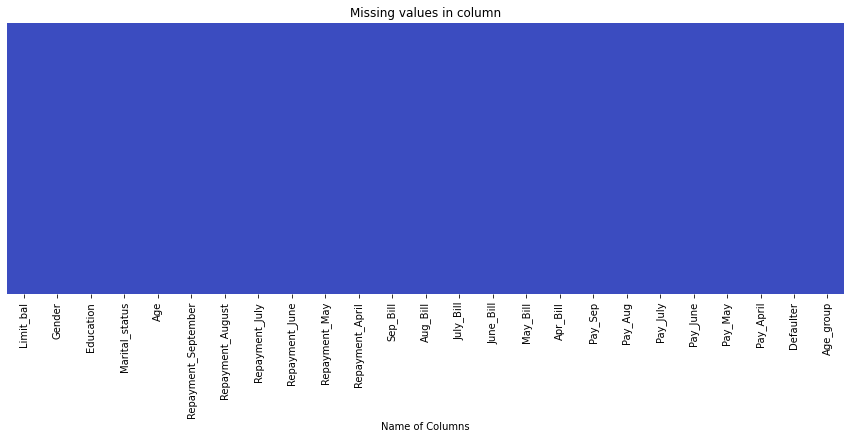

In [269]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(credit_df.isnull(), cbar=False, yticklabels=False,cmap='coolwarm')
plt.xlabel("Name of Columns")
plt.title("Missing values in column")

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

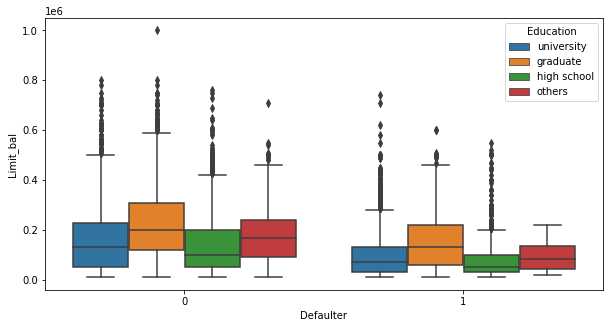

In [270]:
# Visualizing the outlier
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter',hue='Education', y='Limit_bal',data=credit_df )

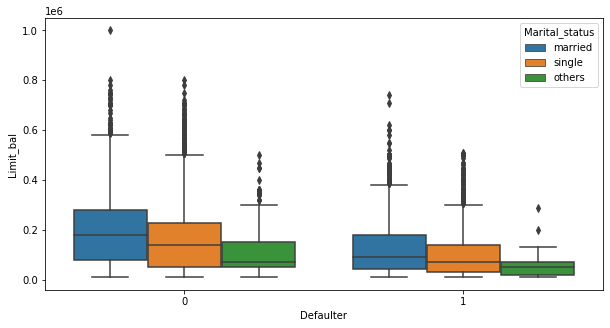

In [271]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter',hue='Marital_status', y='Limit_bal',data=credit_df)

In [272]:
# Take a close look at the outlier
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = credit_df.loc[credit_df['Limit_bal']>900000]
outliers

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,...,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter,Age_group
2197,1000000,Female,graduate,married,47,0,0,0,0,0,...,927171,961664,50784,50723,896040,50000,50000,50256,0,46-50


##### What all outlier treatment techniques have you used and why did you use those techniques?

I found the outliers in my data and after observation from other columns i came to know this was just a customer who has an excellant payment history. Therefore it should be considered as a valid data.

### 3. Categorical Encoding

One hot encoding

In [273]:
# Encode your categorical columns
# Using One hot encoding on categorical features and storing 
credit_df = pd.get_dummies(credit_df,columns =['Gender','Education','Marital_status','Age_group'])

In [274]:
credit_df.columns

Index(['Limit_bal', 'Age', 'Repayment_September', 'Repayment_August',
       'Repayment_July', 'Repayment_June', 'Repayment_May', 'Repayment_April',
       'Sep_Bill', 'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill',
       'Apr_Bill', 'Pay_Sep', 'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May',
       'Pay_April', 'Defaulter', 'Gender_Female', 'Gender_Male',
       'Education_graduate', 'Education_high school', 'Education_others',
       'Education_university', 'Marital_status_married',
       'Marital_status_others', 'Marital_status_single', 'Age_group_21-25',
       'Age_group_26-30', 'Age_group_31-35', 'Age_group_36-40',
       'Age_group_41-45', 'Age_group_46-50', 'Age_group_51-55',
       'Age_group_56-60', 'Age_group_61 and Above'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is used here as we were having categorical features.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [275]:
# Manipulate Features to minimize feature correlation and create new features
 #not req.

#### 2. Feature Selection

In [276]:
# Select your features wisely to avoid overfitting
X =credit_df.drop(columns=['Defaulter','Age'])
y =credit_df['Defaulter']

##### Which all features you found important and why?

### 5. Data Transformation

In [277]:
#Not required.

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Handling Imbalanced Dataset

0    23364
1     4302
Name: Defaulter, dtype: int64
 


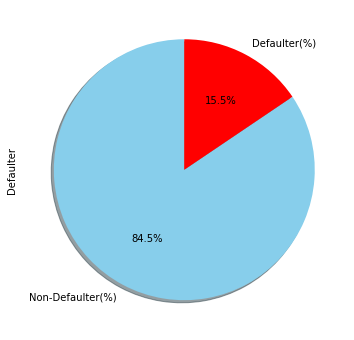

In [278]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(credit_df.Defaulter.value_counts())
print(" ")
# Dependant Variable Column Visualization
credit_df['Defaulter'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Non-Defaulter(%)','Defaulter(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. 

Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 85:15. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [279]:
# Handaling imbalance dataset using SMOTE

#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(credit_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 27666
Resampled dataset shape 46728


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE. 

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method. 

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm. 

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

### 7. Data Splitting

In [280]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test spilt data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=0)

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split.

As we know 80/20 split is quite a commonly occurring ratio, often referred to as the Pareto principle.

But,in this case also I have taken 75:25 ratio.

### 8. Data Scaling

In [281]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I used MinMaxscaler as it preserves the shape of the original distribution. Note that MinMaxScaler doesn't reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

### 7. Dimesionality Reduction

As per my knowledge, for this dataset dimensionality reduction is not required.

## ***7. ML Model Implementation***

The following algorithms are used in ML implemenation

1.Logistic Regression 

2.k_nearest neighbours

3.RandomForestClassifier

4.XGB boostclassifier

### **ML Model - 1. Logistic Regression:**

In [282]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [283]:
# Checking the coefficients
clf.coef_

array([[-1.03912759, 10.67658641,  0.75519992,  2.29288297,  1.02633021,
         0.55780283,  2.46837604, -1.59606596,  0.08224054, -0.81351482,
         0.71394792,  0.99873966,  0.50315801, -3.11933637, -1.95363656,
        -1.28251025, -2.4283412 , -2.44071756, -2.42911729, -4.83565893,
        -4.76653857, -4.33189124, -4.58832372, -5.8028543 , -4.45877835,
        -4.0912132 , -4.16504117, -4.28666242, -4.41613305, -4.7006353 ,
        -4.84434344, -4.70370025, -4.65941503, -4.49765945, -4.75746371,
        -4.55719138, -4.19391615]])

In [284]:
# Checking the intercept value
clf.intercept_

array([15.70498403])

In [285]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [286]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [287]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9254693830965017
The accuracy on test data is  0.9232152028762198


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[16802   764]
 [ 1848 15632]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

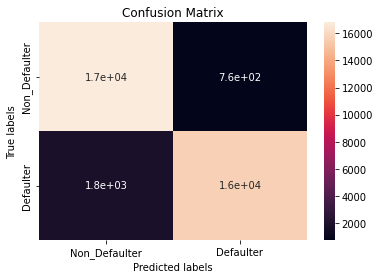

In [288]:
# Visualizing evaluation Metric Score chart

#  confusion matrix for train 
labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[5546  252]
 [ 645 5239]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

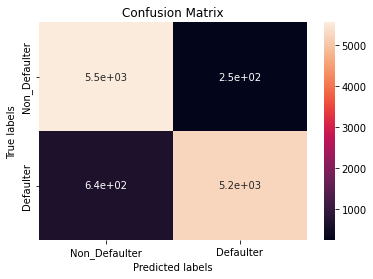

In [289]:
# Get the confusion matrix for test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [290]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     18650
           1       0.89      0.95      0.92     16396

    accuracy                           0.93     35046
   macro avg       0.93      0.93      0.93     35046
weighted avg       0.93      0.93      0.93     35046

 
roc_auc_score_train
0.9253930322541649


In [291]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      6191
           1       0.89      0.95      0.92      5491

    accuracy                           0.92     11682
   macro avg       0.92      0.92      0.92     11682
weighted avg       0.93      0.92      0.92     11682

 
roc_auc_score_test
0.9234587151058208


I used Logistic regression algorithm to create the model. 

For training dataset, i found precision of 96% and recall of 90% and f1-score of 93% for Non-Defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 89% and recall of 95% and f1-score of 92%. Accuracy is 92% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 92.6%.

For testing dataset, i found precision of 96% and recall of 90% and f1-score of 93% for Non-Defaulter customer data. But, I am also interested to see the result for Defaulter cutomer result as I got precision of 89% and recall of 95% and f1-score of 92%. Accuracy is 93% and average percision, recall & f1_score are 92%, 92% and 92% respectively with a roc auc score of 92.3%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [292]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(logistic, param_grid=grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.923137 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [293]:
# result dataframe for train data
lr_train_roc=roc_auc_score(y_train, train_class_preds)
lr_train_acc = accuracy_score(y_train, train_class_preds)
lr_train_prec = precision_score(y_train, train_class_preds)
lr_train_rec = recall_score(y_train, train_class_preds)
lr_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_train_acc,lr_train_prec,lr_train_rec, lr_train_f1,lr_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.926154,0.952095,0.897082,0.92377,0.926083


In [294]:
# result dataframe for test data
lr_test_roc=roc_auc_score(y_test, test_class_preds)
lr_test_acc = accuracy_score(y_test, test_class_preds)
lr_test_prec = precision_score(y_test, test_class_preds)
lr_test_rec = recall_score(y_test, test_class_preds)
lr_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_test_acc,lr_test_prec,lr_test_rec, lr_test_f1,lr_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.925013,0.953623,0.89463,0.923185,0.925238


In [295]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     18576
           1       0.90      0.95      0.92     16470

    accuracy                           0.93     35046
   macro avg       0.93      0.93      0.93     35046
weighted avg       0.93      0.93      0.93     35046

 
roc_auc_score_train
0.9260830321264998


In [296]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      6162
           1       0.89      0.95      0.92      5520

    accuracy                           0.93     11682
   macro avg       0.93      0.93      0.92     11682
weighted avg       0.93      0.93      0.93     11682

 
roc_auc_score_test
0.9252381737390868


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization..

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 96% and recall of 90% and f1-score of 93% for Non-Defaulter customer data. But, I am also interested to see the result for Defaulter cutomer result as I got precision of 90% and recall of 95% and f1-score of 92%. Accuracy is 93% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 92.7%.

Quite improvment seen in precsion, f1 score,accuracy.

For testing dataset, i found precision of 96% and recall of 90% and f1-score of 93% for Non-Defaulter customer data. But, I am also interested to see the result for Defaulter cutomer result as I got precision of 89% and recall of 95% and f1-score of 92%. Accuracy is 92% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 92.5%.

Quite improvemnt seen in precsion of 1% and rest is same.


### **ML Model - 2.  K_nearest neighbours(knn):**

In [297]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

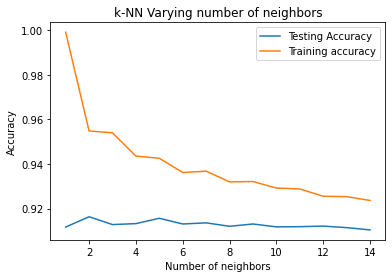

In [298]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [299]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=14)

# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [300]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[16787   779]
 [ 1896 15584]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

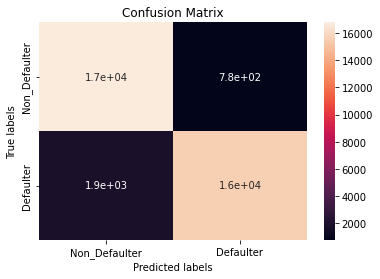

In [301]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[5489  309]
 [ 737 5147]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

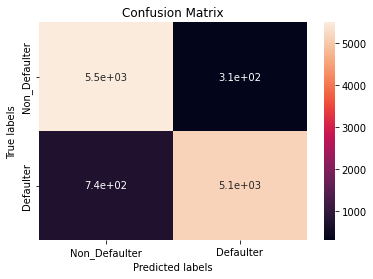

In [302]:
# Get the confusion matrix test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [303]:
kn_train_roc=roc_auc_score(y_train, train_class_preds)
kn_train_acc = accuracy_score(y_train, train_class_preds)
kn_train_prec = precision_score(y_train, train_class_preds)
kn_train_rec = recall_score(y_train, train_class_preds)
kn_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Random Forest', kn_train_acc,kn_train_prec,kn_train_rec, kn_train_f1,kn_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.923672,0.952393,0.891533,0.920959,0.923593


In [304]:
kn_test_roc=roc_auc_score(y_test, test_class_preds)
kn_test_acc = accuracy_score(y_test, test_class_preds)
kn_test_prec = precision_score(y_test, test_class_preds)
kn_test_rec = recall_score(y_test, test_class_preds)
kn_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', kn_test_acc,kn_test_prec,kn_test_rec, kn_test_f1,kn_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results
     

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.910461,0.943365,0.874745,0.90776,0.910725


In [305]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     18683
           1       0.89      0.95      0.92     16363

    accuracy                           0.92     35046
   macro avg       0.92      0.93      0.92     35046
weighted avg       0.93      0.92      0.92     35046

 
roc_auc_score_train
0.9235930733674973


In [306]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6226
           1       0.87      0.94      0.91      5456

    accuracy                           0.91     11682
   macro avg       0.91      0.91      0.91     11682
weighted avg       0.91      0.91      0.91     11682

 
roc_auc_score_test
0.9107254159935597


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I used KNN algorithm to create the model 

For training dataset, i found precision of 96% and recall of 90% and f1-score of 93% for Non_defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 89% and recall of 95% and f1-score of 92%. Accuracy is 92% and average percision, recall & f1_score are 93%, 92% and 92% respectively with a roc auc score of 92.3%.

For testing dataset, i found precision of 95% and recall of 88% and f1-score of 91% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 87% and recall of 94% and f1-score of 91%. Accuracy is 91% and average percision, recall & f1_score are 91%, 91% and 91% respectively with a roc auc score of 91%.

### **ML Model - 3. Random Forest Classifier:**

In [307]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [308]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9991439821948297
The accuracy on test dataset is 0.9304913542201678


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[17552    14]
 [   16 17464]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

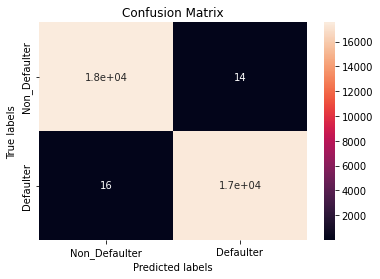

In [309]:
# Visualizing evaluation Metric Score chart

#confusion matrix for train

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[5274  524]
 [ 288 5596]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

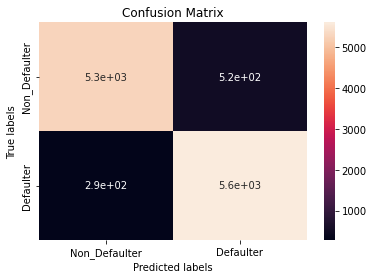

In [310]:
#confusion matrix for train

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [311]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17568
           1       1.00      1.00      1.00     17478

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046

 
roc_auc_score_train
0.9991438369994459


In [312]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5562
           1       0.95      0.91      0.93      6120

    accuracy                           0.93     11682
   macro avg       0.93      0.93      0.93     11682
weighted avg       0.93      0.93      0.93     11682

 
roc_auc_score_test
0.9303388566206636


I used Random Forest algorithm to create the model and overfittingcan be seen in the training data.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for Non_defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 99.9%.

For testing dataset, i found precision of 91% and recall of 95% and f1-score of 93% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 95% and recall of 91% and f1-score of 93%. Accuracy is 93% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 93%.

Next tryting to improving the score by using hyperparameter tuning technique.


#### 2. Cross- Validation & Hyperparameter Tuning

In [313]:
# n_estimators-----> Number of trees

# max_depth--------> Maximum depth of trees

# min_samples_split------> Minimum number of samples required to split a node 

# min_samples_leaf-------> Minimum number of samples required at each leaf node 

In [314]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# random forest model
randomForest = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[50,80,100],'max_depth':[4,6,8],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50]
             }
# Fit the Algorithm
rf_grid= GridSearchCV(randomForest, parameters, scoring='f1', cv=6)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1')

In [315]:
# model best parameters
print(f'The best fit is found to be {rf_grid.best_params_}')

The best fit is found to be {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [316]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

[[15074  2492]
 [  755 16725]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

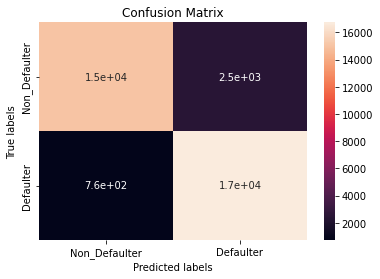

In [317]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4936  862]
 [ 289 5595]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

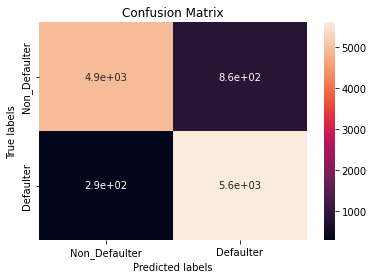

In [318]:
# Get the confusion matrix test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [319]:
# result dataframe for train data
rf_train_roc=roc_auc_score(y_train, train_class_preds)
rf_train_acc = accuracy_score(y_train, train_class_preds)
rf_train_prec = precision_score(y_train, train_class_preds)
rf_train_rec = recall_score(y_train, train_class_preds)
rf_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Logistic Regression', rf_train_acc,rf_train_prec,rf_train_rec, rf_train_f1,rf_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.90735,0.870323,0.956808,0.911519,0.907471


In [320]:
# result dataframe for test data
rf_test_roc=roc_auc_score(y_test, test_class_preds)
rf_test_acc = accuracy_score(y_test, test_class_preds)
rf_test_prec = precision_score(y_test, test_class_preds)
rf_test_rec = recall_score(y_test, test_class_preds)
rf_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', rf_test_acc,rf_test_prec,rf_test_rec, rf_test_f1,rf_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.901472,0.866501,0.950884,0.906734,0.901106


In [321]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15829
           1       0.96      0.87      0.91     19217

    accuracy                           0.91     35046
   macro avg       0.91      0.91      0.91     35046
weighted avg       0.91      0.91      0.91     35046

 
roc_auc_score_train
0.9074714069539893


In [322]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      5225
           1       0.95      0.87      0.91      6457

    accuracy                           0.90     11682
   macro avg       0.90      0.91      0.90     11682
weighted avg       0.91      0.90      0.90     11682

 
roc_auc_score_test
0.9011058983512212


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 86% and recall of 95% and f1-score of 90% for Non-Defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 96% and recall of 87% and f1-score of 91%. Accuracy is 91% and average percision, recall & f1_score are 91%, 91% and 91% respectively with a roc auc score of 90.7%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 85% and recall of 94% and f1-score of 90% for Non-Defaulter customer data. But, I am also interested to see the result for Defaulter cutomer result as I got precision of 95% and recall of 87% and f1-score of 91%. Accuracy is 90% and average percision, recall & f1_score are 91%, 90% and 90% respectively with a roc auc score of 90.1%.

Quite improvemnt seen in recall but rest scores have decreased.

### **ML Model -4. XgBoost Classifier:**

In [323]:
# ML Model - 3 Implementation
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[16079  1487]
 [ 1159 16321]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

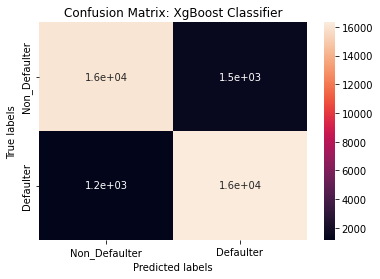

In [324]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[5289  509]
 [ 414 5470]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

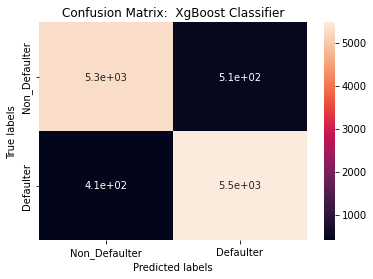

In [325]:
# Get the confusion matrix test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix:  XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [326]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     17238
           1       0.93      0.92      0.93     17808

    accuracy                           0.92     35046
   macro avg       0.92      0.92      0.92     35046
weighted avg       0.92      0.92      0.92     35046

 
roc_auc_score_train
0.9245217416055721


In [327]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5703
           1       0.93      0.91      0.92      5979

    accuracy                           0.92     11682
   macro avg       0.92      0.92      0.92     11682
weighted avg       0.92      0.92      0.92     11682

 
roc_auc_score_test
0.9209254040810623


Then, I used XGBoost algorithm to create the model. As I got there  good result.

For training dataset, i found precision of 92% and recall of 93% and f1-score of 92% for Non-Defaulter customer data. But, I am also interested to see the result for Defaulter cutomer result as I got precision of 93% and recall of 92% and f1-score of 93%. Accuracy is 93% and average percision, recall & f1_score are 92%, 92% and 92% respectively with a roc auc score of 92.4%.

For testing dataset, i found precision of 91% and recall of 93% and f1-score of 92% for Non_Defaulter data customer data. But, I am also interested to see the result for Defaulter cutomer result as I got precision of 93% and recall of 91% and f1-score of 92%. Accuracy is 92% and average percision, recall & f1_score are 92%, 92% and 92% respectively with a roc auc score of 92%.

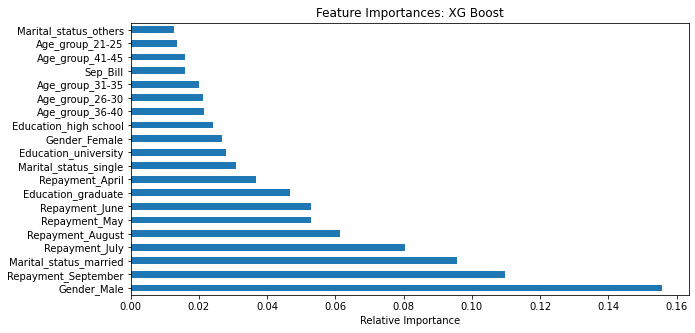

In [328]:
# Feature importances
rf_feat_imp = pd.Series(xg_models.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* **Gender_male in the most important feature in deciding the outcome of the variables for XG boost followed by Repayment_Sept.**
* **Multiple features are given importance here rather than just one feature in case of XG boost.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [348]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# random forest model
Xgboost = XGBClassifier(random_state=0)
parameters = {'n_estimators':[50,80,100],'max_depth':[4,6,8],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50]
             }
# Fit the Algorithm
XGB_grid= GridSearchCV(Xgboost, parameters, scoring='roc_auc', cv=5)
XGB_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [349]:
# model best parameters
print(f'The best fit is found to be {XGB_grid.best_params_}')

The best fit is found to be {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [351]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = XGB_grid.predict(X_train)
test_class_preds = XGB_grid.predict(X_test)

In [352]:
# result dataframe for train data
Xgb_train_roc=roc_auc_score(y_train, train_class_preds)
Xgb_train_acc = accuracy_score(y_train, train_class_preds)
Xgb_train_prec = precision_score(y_train, train_class_preds)
Xgb_train_rec = recall_score(y_train, train_class_preds)
Xgb_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_train_acc,Xgb_train_prec,Xgb_train_rec, Xgb_train_f1,Xgb_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBoost Classifier,0.972978,0.97229,0.97357,0.97293,0.97298


In [353]:
# result dataframe for test data
Xgb_test_roc=roc_auc_score(y_test, test_class_preds)
Xgb_test_acc = accuracy_score(y_test, test_class_preds)
Xgb_test_prec = precision_score(y_test, test_class_preds)
Xgb_test_rec = recall_score(y_test, test_class_preds)
Xgb_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_test_acc,Xgb_test_prec,Xgb_test_rec, Xgb_test_f1,Xgb_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBoost Classifier,0.930406,0.932605,0.92896,0.930779,0.930416


In [354]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17543
           1       0.97      0.97      0.97     17503

    accuracy                           0.97     35046
   macro avg       0.97      0.97      0.97     35046
weighted avg       0.97      0.97      0.97     35046

 
roc_auc_score_train
0.9729798190335969


In [355]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5821
           1       0.93      0.93      0.93      5861

    accuracy                           0.93     11682
   macro avg       0.93      0.93      0.93     11682
weighted avg       0.93      0.93      0.93     11682

 
roc_auc_score_test
0.9304164754531029


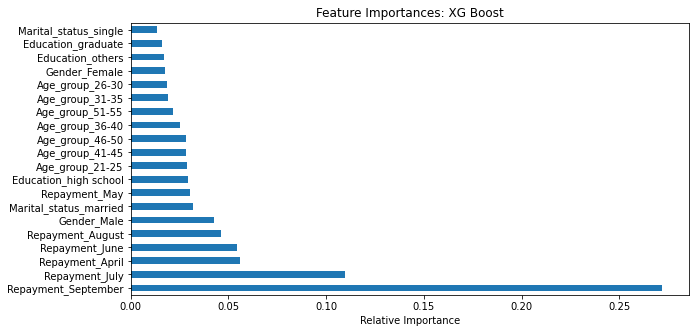

In [356]:
# Feature importances
rf_feat_imp = pd.Series(XGB_grid.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 97% and recall of 97% and f1-score of 97% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 97% and recall of 97% and f1-score of 97%. Accuracy is 97% and average percision, recall & f1_score are 97%, 97% and 97% respectively with a roc auc score of 97.3%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score.

For testing dataset, i found precision of 93% and recall of 93% and f1-score of 93% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 93% and recall of 93% and f1-score of 93%. Accuracy is 93% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 93%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score by 1%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with both Recall and Precision and which describes both is F1 Score. 

To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will default but the customer didn't default. But according to our model it will default. Again false negative defines as model will predict that the customer won't default but the customer really defaulted. That will be an issue for us. So, for that case we have to minimize the false negative and false positive we must improve the score of both precision as well as recall which should direclt affect the f1_score positively. So, in our case recall will stand the higher but precision can't be neglected. so, ***recall should be higher and f1_score should be moderate.***

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [357]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Model','Train_Accuracy','Test_Accuracy', 'Train_Precision','Test_Precision','Train_Recall','Test_Recall','Train_F1_score','Test_F1_score'])
test.add_row(['1','Logistic Regression',lr_train_acc,lr_test_acc,lr_train_prec,lr_test_prec,lr_train_rec,lr_test_rec,lr_train_f1,lr_test_f1])
test.add_row(['2','k_nearest neighbours',kn_train_acc,kn_test_acc,kn_train_prec,kn_test_prec,kn_train_rec,kn_test_rec,kn_train_f1,kn_test_f1])
test.add_row(['3','Random Forest',rf_train_acc,rf_test_acc,rf_train_prec,rf_test_prec,rf_train_rec,rf_test_rec,rf_train_f1,rf_test_f1])
test.add_row(['4','XGboost Classsifier',Xgb_train_acc,Xgb_test_acc,Xgb_train_prec,Xgb_test_prec,Xgb_train_rec,Xgb_test_rec,Xgb_train_f1,Xgb_test_f1])

print(test)

+---------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Sl. No. |        Model         |   Train_Accuracy   |   Test_Accuracy    |  Train_Precision   |   Test_Precision   |    Train_Recall    |    Test_Recall     |   Train_F1_score   |   Test_F1_score    |
+---------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    1    | Logistic Regression  | 0.926154197340638  | 0.9250128402670775 | 0.9520947176684882 | 0.9536231884057971 | 0.8970823798627002 | 0.8946295037389531 | 0.9237702503681885 | 0.9231848474219573 |
|    2    | k_nearest neighbours | 0.923671745705644  | 0.9104605375791817 | 0.9523925930452851 | 0.9433651026392962 | 0.891533180778032  | 0.8747450713800136 | 0.9209585438643146 | 0.9077

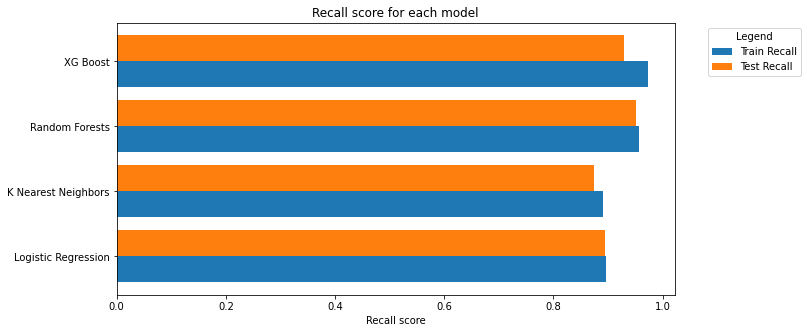

In [358]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Random Forests','XG Boost']
train_recalls = [lr_train_rec,kn_train_rec,rf_train_rec,Xgb_train_rec]
test_recalls = [lr_test_rec,kn_test_rec,rf_test_rec,Xgb_test_rec]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

I have choosen XGBoost model which is hyperparameter optimized. First of all I need accuracy for the default prediction and time isn't a constrain here and in banking domain we need accuracy. Thus,I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.

From the above chart shot, we can clearly see that for XGBoost has a improved score of f1_score over random forest. The accuracy and roc auc score is also improved for xg boost. The test recall might be high in random forest but when it comes to precision and f1_score for train and test, it's high.

So, I have chosen XGBoost as the final prdiction model which should be deployed for real user interaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

* We will use Shapley values  to explain the black box model(XG boost).
* It shows the contribution or the importance of each feature on the prediction of the model. This makes it more explainable.

In [339]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [340]:
# importing shap
import shap 

In [359]:
#Get shap values
explainer = shap.Explainer(XGB_grid.best_estimator_)
shap_values = explainer(X_test)

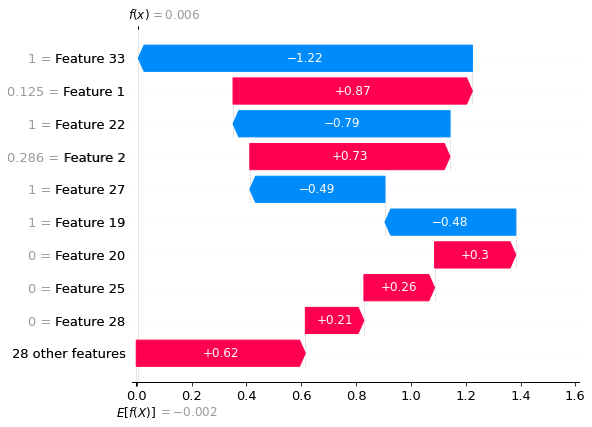

In [360]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.


There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [361]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress. you can see we start at the same base value of 0.01.

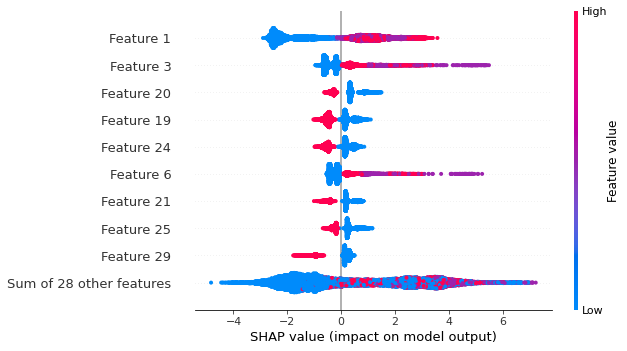

In [362]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

**The above plot is called bee swarm plot, which helps us understand the global importance / contribution of each feature.**

Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are Red). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships. 

# **Conclusion:**

* **From the above chart I got to know that, there are 23364 customers that are not deafulter which is 84.5% of the whole customers data given in the dataset.** 
* **On other hand, 4302 customers are defaulter which is 15.5%% of the whole customers data given in the dataset.**
* **The dependent variable - Defaulter is imbalanced, with 84.5% non-default vs. 15.5% default.**
* **More number of credit defaulters are female.**
* **More number of credit  defaulters are university students followed by Graduates and High school students.**
* **People who have marital status single have less default payment wrt married status people.**
* **The people of age group 26-40 year old are more likely to get default.**
* **We came to know that there are few customers who are having significantly high credit limit.**
* **From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.**
* **There was a huge jump from May, 2005 to Sept, 2005 when delayed payment increased significantly, then it peaked at Sept, 2005.**



##**Final choice of model :**

* **We can deploy the model with XGBoost algorithm. Because For training dataset, i found precision of 97% and recall of 97% and f1-score of 97% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 97% and recall of 97% and f1-score of 97%. Accuracy is 97% and average percision, recall & f1_score are 97%, 97% and 97% respectively with a roc auc score of 97.3%.For testing dataset, i found precision of 93% and recall of 93% and f1-score of 93% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 93% and recall of 93% and f1-score of 93%. Accuracy is 93% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 92.9%.It's the best performing model i found.**

* **No overfitting is seen.**
* **Form all the above outcomes, we can conclude that XGboosting with hyperparameters we got the best results**



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***